In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

en_train_dict = {}
i = 0
for line in open('./BertForRD/data/mix/en_train500_10.csv'):
    word, definition = line\
                        .replace("\n", '')\
                        .replace(" , ", ", ")\
                        .replace(" .", "")\
                        .replace(" ; ", "; ")\
                        .split("\t")
    en_train_dict[i] = [word, definition]
    i+=1

In [2]:
en_train = pd.DataFrame.from_dict(en_train_dict, orient='index', columns=['word', 'definition'])

In [3]:
en_train[en_train.word == 'zucchero']
# 'zucchero' is the italian word for 'sugar', and definitely not a verb, as the definition suggests

,word,definition
108181,zucchero,first-person singular indicative present of


In [4]:
en_train[en_train.word == 'iodonium'].iloc[1]
# We have a lot of definitions like this one (especially around chemistry) 
# that don't really add anything

word                                       iodonium
definition    any organic derivative of this cation
Name: 215567, dtype: object

In [5]:
en_train[en_train.definition.str.contains("<concept>")]
# These are not wrong per se, but they look similar to the structure of a masked model.
# I think the word <concept> might be messing with the training. 
# But if we feed these examples as if it really was a masked model, maybe they will be useful.

,word,definition
26,taire,"se <concept> to shut up, to be quiet, to fall silent, to stop talking"
27,spray,"<concept> fine, gentle, disperse mist of liquid"
41,solar,<concept> relating to sunlight or solar energy
91,north,"The positive or <concept> pole of a magnet, which seeks the magnetic pole near Earth s geographic North Pole"
95,transgressor,offender; <concept> a person who commits an offence
...,...,...
227988,pope,An effigy of the <concept> traditionally burnt in Britain on Guy Fawkes Day and at other times
228010,stink,To cause to <concept>; to affect by a stink
228020,grise,"<concept> til - to dirty, to mess up"
228127,migration,<concept> movement from one place to another


In [6]:
en_train[en_train.apply(lambda x: x['word'] in x['definition'], axis=1)]
# All these words are contained in the definition. 
# For our use case this is not very useful, as our premise is that we are using the reverse dictionary because  we don't know the word

,word,definition
12,supralapsarian,A follower of supralapsarianism
41,solar,<concept> relating to sunlight or solar energy
52,fi,finish; the end
137,scrimmage,"In American football or Canadian football, a play that begins with a snap from the center while opposing teams are on either side of a line of scrimmage"
188,cons,To obtain a list from a <concept> or a nesting of conses; to prepend an element to a list by forming a cons of that element and the list; to obtain a list from a smaller one by repeated application of such kind of prepending
...,...,...
228035,jó,"river occurs in compound proper names, such as Sajó, ,"
228083,arrester,"A device that stops or prevents, such as a railway buffer, or a spark arrester that prevents sparks from being released to start fires"
228104,offensiv,"offensive, attacking, aggressive"
228124,chunk,To break down into conceptual chunks of manageable size


In [7]:
en_train[en_train.word == 'zolla']
# Another italian word (the definitions are correct, if this was a cross-lingual reverse dicitonary)

,word,definition
10764,zolla,"turf, sod, divot"
154531,zolla,"lump, tussock, hassock"
228140,zolla,a small plot of land; a small field


In [8]:
en_train[en_train.word == 'amico']
# More italian words???

,word,definition
49658,amico,I make friendly to myself
138745,amico,"friend, companion, pardner"


In [9]:
en_train[en_train.word == 'bird']
# I think you had identified these... the first 2 are very weird

,word,definition
13870,bird,from the early 20th c
29506,bird,"A man, from the mid-19th c"
54757,bird,"A member of the class of animals Aves in the phylum Chordata, characterized by being warm-blooded, having feathers and wings usually capable of flight, and laying eggs"
95406,bird,A chicken; the young of a fowl; a young eaglet; a nestling
100633,bird,"A girl or woman, especially one considered sexually attractive"
121104,bird,To seek for game or plunder; to thieve
147598,bird,To observe or identify wild birds in their natural environment
212336,bird,To catch or shoot birds
226841,bird,The vulgar hand gesture in which the middle finger is extended


In [10]:
en_train[en_train.word == 'chick'].iloc[1]
# This is a positive one :)
# If you compare this definition with the one above numbered 100633, you can see that for the same
# word sense they used slightly different definitions, which is good. 
# In WordNet this would be one definition.

word                                                          chick
definition    A young, especially attractive, woman or teenage girl
Name: 49470, dtype: object

In [11]:
en_train.sample(10)

,word,definition
38069,unfavourable,opposing or hindering
227489,load,"Used to form nouns that indicate a large quantity, often corresponding to the capacity of a vehicle"
33256,bounce,To be refused by a bank because it is drawn on insufficient funds
76732,kindred,"People of the same ethnic descent, not including speaker; en"
171084,kilt,To gather up around the from 14th c
157669,childhood,The state of being a child
9423,virtuality,The quality of being virtual ;
58877,wench,"A young woman, especially a servant"
190236,mirror,A website or other online resource that contains replicated data
36733,sina,Ikavian shadow; shade


In [12]:
en_train[en_train.definition.str.contains('\} \}') | en_train.definition.str.contains('\] \]')]
# I think we should remove these parentheses

,word,definition
546,widget,"placeholder name for an unnamed, unspecified, or hypothetical manufactured good or product } }"
747,parado,erect tener or traer } }
816,te,Latin script ] ] letter T / t
829,cair,or mal } } to suit to be appropriate or suitable
835,shielder,Agent noun ] ] of shield : one who shields
...,...,...
227089,ingratiate,} } To recommend; to render easy or agreeable
227269,maguro,"Tuna ] ] meat, eaten raw as sushi or sashimi"
227428,zèbre,Jersey greater weever } }
227622,pirarucu,"<concept>; arapaima, a freshwater fish of South America } }"


In [13]:
en_train[en_train.definition.str.contains('< ! --')]
# Also this should be removed

,word,definition
3846,heißen,{ { inflection of heiß lang = de < ! --
27452,multiplication,"The process of computing the sum of a number with itself a specified number of times, or any other analogous binary operation that combines other mathematical objects < ! --"
39315,ambassador,An official messenger and representative < ! --
64119,falconer,A person who breeds or trains hawks or other birds of prey for taking birds or game < ! --
64469,matura,A final exam that young adults take at the end of their secondary education in certain European countries < ! --
69202,milker,A woman ’ s breast < ! -- https : / / / books ? id = & pg =
76358,address,Attention in the way one addresses a lady < ! --
94659,taeniasis,An infection of tapeworms of the genus Taenia that does not usually cause any disease < ! --
114341,weißer,{ { inflection of weiß lang = de < ! --
162008,halberd,A hand weapon consisting of a long pole fitted with a metal head; the head consists of a blade similar to an axe and usually a spike or hook < ! --


In [14]:
en_train[en_train.definition.str.contains(':')]
# also remove all the punctuation

,word,definition
241,calliope,The bird : Siberian rubythroat
283,carnivorous,Insectivorous : capable of trapping insects and absorbing nutrient from them
304,multiphonic,Having the character of multiphonics : sounding two or more pitches at the same time
416,maddah,In Persian the letter is used only in the beginning of a word with a long / aː / :
479,punker,A punk rocker : a performer or enthusiast of punk rock
...,...,...
227519,berula,a herb : bittercress or
227848,polyvagal,"Of or relating to a theory that specifies two functionally distinct branches of the vagus, or tenth cranial nerve : a primitive branch eliciting immobilization behaviors and a more evolved branch linked to social communication and self-soothing behaviors"
227954,purposive,Of a clause or conjunction : expressing from 20th c
228019,regret,"To feel sorry about, : to wish that a thing had not happened, that something else had happened instead"


In [15]:
v_counts = en_train.word.value_counts()

In [16]:
monosemous = set(v_counts[v_counts == 1].index)
polysemous = set(v_counts[v_counts != 1].index)

In [17]:
print(f"Poly: {len(polysemous)}")
print(f"Mono: {len(monosemous)}")

Poly: 44970
Mono: 72327


In [18]:
import seaborn as sns

/Users/manu/deep_learning_nlp/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word', ylabel='Density'>

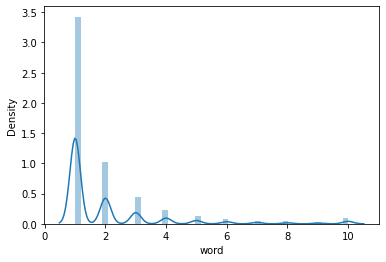

In [19]:
sns.distplot(v_counts)

<AxesSubplot:xlabel='definition', ylabel='Density'>

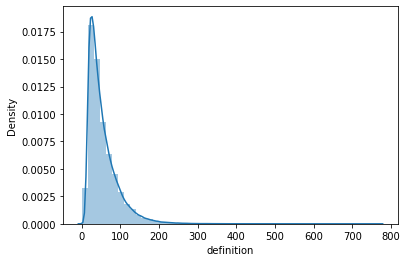

In [21]:
sns.distplot(en_train.definition.apply(len))

In [25]:
en_train[en_train.definition.apply(len) > 300]

,word,definition
1137,aerocapture,"A form of aerobraking in which no initial burn is performed Instead, the spacecraft plunges deeply into the atmosphere without an initial insertion burn, and emerges from this single pass in the atmosphere with an apoapsis near that of the desired orbit Several small correction burns are then used to raise the periapsis and perform final adjustments"
2472,conga,"a march of Cuban origin in four-four time in which people form a chain, each holding the hips of the person in front of them; in each bar, dancers take three shuffle steps and then kick alternate legs outwards at the beat; the chain weaves around the place and allows new participants to join the back of the chain"
3143,lunation,"a month of approximately 29.53 days, measured from a lunar phase until the return of that same phase On average, the number of days between Full Moons is about days The actual number of days may differ from the average number by more than a half day From one Full Moon to the next, the number of days in one lunation can vary between and days"
4928,metacommunication,"Communication that indicates how verbal information should be interpreted; stimuli surrounding the verbal communication that also have meaning, which may or may not be congruent with that of or support the verbal talk It may support or contradict verbal communication; Communication which is implicit and not expressed in words"
5252,haka,"A group dance of New Zealand s Maori people featuring rhythmic chanting, vigorous facial and arm movements, and foot stamping Traditionally a war dance, today it is also performed to welcome guests, as a mark of respect at occasions such as commemorations and funerals, as a challenge to opposing teams at sports events, and for artistic purposes"
...,...,...
222670,slumgullion,"A sperm whaleman s term, roughly equivalent to the right whaleman s gurry which, according to Herman Melville, designates the dark, glutinous substance which is scraped off the back of the Greenland or Right Whale, and much of which covers the decks of those inferior souls who hunt that ignoble Leviathan Derivation for this term likely originates with the word which is, according to Melville s Moby Dick, an appellation original with the whaleman, and even so is the nature of the substance It is an ineffably oozy, stringy affair, most frequently found in the tubs of sperm, after a prolonged squeezing, and subsequent decanting I hold it to be the wondrously thin, ruptured Membranes of the case, coalescing"
222694,airbag,"A protective system in automobiles in which when a crash occurs, a bag containing nitrogen, formed by the explosive decomposition of sodium azide, quickly inflates in front of the driver or passenger, preventing injury to the head Side air bags, including the back seat passengers, also prevent injury"
223754,seseo,"An accent in Spanish and Galician that pronounces z as / s / and c before e or i as / s / Someone who has a seseo accent would pronounce the words caza, meaning he or she hunts, and casa, meaning house, with an sound The words would sound identical This accent can be typically found in the north-central of Spain and throughout the Americas"
224105,chack,"To not broadcast a medal-winning or otherwise memorable or crucial figure skating performance This only occurs in a live broadcast because the network has to decide which programs to show and which to cut in the interest of time If a skater is low in the rankings and several big names are set to skate later, that performance may be cut"
